<a href="https://colab.research.google.com/github/Adam5567/DataScience-Python-Notebooks/blob/master/Shark_Attacks_Data_Manipulation_(In_Progress_11_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook takes a messy dataset on shark attacks and prepares it for ideal ML techniques.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attacks.csv to attacks.csv


In [ ]:
data = pd.read_csv('attacks.csv', encoding='latin-1')

In [ ]:
#Our first look at the data
#We can tell that some work needs to be done before the set is optimized for anaylsis
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6095 non-null   object 
 1   Date                    6094 non-null   object 
 2   Year                    6092 non-null   float64
 3   Type                    6090 non-null   object 
 4   Country                 6048 non-null   object 
 5   Area                    5682 non-null   object 
 6   Location                5583 non-null   object 
 7   Activity                5559 non-null   object 
 8   Name                    5888 non-null   object 
 9   Sex                     5517 non-null   object 
 10  Age                     3374 non-null   object 
 11  Injury                  6066 non-null   object 
 12  Fatal (Y/N)             6064 non-null   object 
 13  Time                    2848 non-null   object 
 14  Species                 3100 non-null 

In [ ]:
#This is a large amount if null values!
data.isnull().sum()

Case Number               19519
Date                      19520
Year                      19522
Type                      19524
Country                   19566
Area                      19932
Location                  20031
Activity                  20055
Name                      19726
Sex                       20097
Age                       22240
Injury                    19548
Fatal (Y/N)               19550
Time                      22766
Species                   22514
Investigator or Source    19537
pdf                       19520
href formula              19521
href                      19521
Case Number.1             19520
Case Number.2             19520
original order            19520
dtype: int64

In [ ]:
data.nunique()

Case Number               6079
Date                      5197
Year                       240
Type                         6
Country                    204
Area                       799
Location                  3984
Activity                  1503
Name                      5086
Sex                          6
Age                        151
Injury                    3645
Fatal (Y/N)                  9
Time                       360
Species                   1555
Investigator or Source    4831
pdf                       6083
href formula              6082
href                      6076
Case Number.1             6077
Case Number.2             6078
original order            6093
dtype: int64

In [ ]:
#This shows the range of possible null values (and other inputs)
#A lot of data cleaning is needed
data['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'UNKNOWN', '2017', ' N', 'F', 'N ', '#VALUE!', 'n'],
      dtype=object)

#An ideal first step is to transform the entire dataframe into Snake Case. This will help others to easily read and make sense of the data. However, we can first drop a few columns completely and save us some time and effort.

In [ ]:
#The case number and year columns are not needed
data.drop(['Case Number', 'Year'], axis =1, inplace= True)

In [ ]:
#Some other columns are nice to have but are not pertient for our purposes here.
data.drop(['Name','Investigator or Source','pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'], axis = 1, inplace = True)

In [ ]:
#remaining columns
#you can see that some columns (such as Sex and Species) have spaces after their string
data.columns

Index(['Date', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Sex ',
       'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species '],
      dtype='object')

In [ ]:
#Converting these columns to snake case
#We also strip the empty space after some of the columns
data.rename(columns=lambda col: col.replace(' ', '_').lower().strip('_'), inplace=True)

In [ ]:
data.head()

,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),time,species
0,2017-06-11,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m"
1,2017-06-10,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,F,NaN,"No injury, knocke off board",N,15h45,7 gill shark
2,2017-06-10,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,M,19,Laceration to left foot,N,10h00,NaN
3,Reported 07-Jun-2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound"
4,2017-06-04,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,M,NaN,Laceration to shin,N,NaN,8' shark


#The outcome of this snake case is simply all lower case columns.

#Now we can take a look at the null values:

In [ ]:
data.isnull().sum()/len(data)

date           0.762083
type           0.762239
country        0.763879
area           0.778168
location       0.782033
activity       0.782970
sex            0.784610
age            0.868275
injury         0.763176
fatal_(y/n)    0.763254
time           0.888811
species        0.878972
dtype: float64

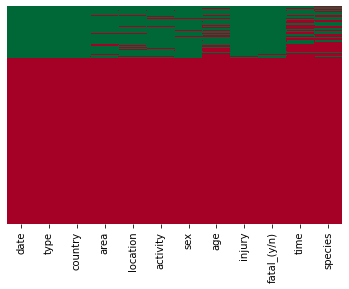

In [ ]:
#The red in this graph represent null values. This accounts for a LOT of the data!
import matplotlib as mpl
import seaborn as sns

sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap='RdYlGn_r')

We can see that a lot of the entries in the data are nothing but NA values. This is likely due to us dropping the columns earlier (meaning they had relevant data for those columns at least)

We can start cleaning this by removing the entries that only have null values

In [ ]:
data.dropna(axis = 0, how = 'all', inplace = True)

In [ ]:
data.isnull().sum()/len(data)

date           0.000164
type           0.000820
country        0.007711
area           0.067760
location       0.084003
activity       0.087941
sex            0.094832
age            0.446432
injury         0.004758
fatal_(y/n)    0.005086
time           0.532732
species        0.491386
dtype: float64

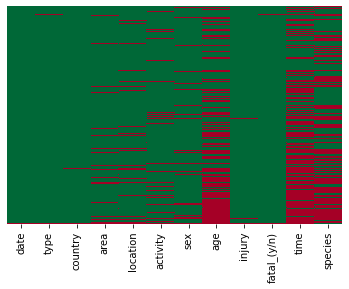

In [ ]:
#After result of removing entires that had only null values
#We can still see a lot of null valuse for the age, time, and species column
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap='RdYlGn_r')

In [ ]:
#The mess of the fatal column
data['fatal_(y/n)'].value_counts()

N          4391
Y          1566
UNKNOWN      94
 N            8
2017          1
F             1
N             1
#VALUE!       1
n             1
Name: fatal_(y/n), dtype: int64

In [ ]:
data.drop(data[data['fatal_(y/n)']=='2017'].index,inplace=True)

In [ ]:
data.drop(data[data['fatal_(y/n)']=='UNKNOWN'].index,inplace=True)

In [ ]:
data.drop(data[data['fatal_(y/n)']=='#VALUE!'].index,inplace=True)

In [ ]:
data['fatal_(y/n)'].mask(data['fatal_(y/n)'] ==' N','N', inplace=True)

In [ ]:
data['fatal_(y/n)'].mask(data['fatal_(y/n)'] =='F','Y', inplace=True)
data['fatal_(y/n)'].mask(data['fatal_(y/n)'] =='n','N', inplace=True)

In [ ]:
data['fatal_(y/n)'].mask(data['fatal_(y/n)'] =='N ','N', inplace=True)

In [ ]:
#Cleaned fatal column
data['fatal_(y/n)'].value_counts()

N    4401
Y    1567
Name: fatal_(y/n), dtype: int64

In [ ]:
#Looking at the sex column. More mess
data['sex'].value_counts()

M      4856
F       601
M         2
lli       1
N         1
.         1
Name: sex, dtype: int64

In [ ]:
data['sex'].mask(data['sex'] =='M ','M', inplace=True)
data.drop(data[data['sex']=='lli'].index,inplace=True)
data.drop(data[data['sex']=='N'].index,inplace=True)
data.drop(data[data['sex']=='.'].index,inplace=True)

In [ ]:
#Clean sex column
#Interesting statistic here!
data['sex'].value_counts()

M    4858
F     601
Name: sex, dtype: int64

Our options at this point are to remove the columns in question and then to simply delete the entries that still have null values. This would be a point of divergance, as it would take some deliberation which way to proceed. For the age, time, and species column, we can remove them completely or tackle them in a different way. For age, we can simply input a random value for each, or use the mean value for the entire column. We can do the same with time, but only after transforming it (categories may work well here). For the species column, it would be hard to dictate and input randomness into it given that it's already a categorical variable. For that sake we will drop the column completely.

In [ ]:
#This would be a good time to make a copy of the data so far
#In other, real-world situations, it is a good idea to start out the notebook by making a copy of the original data

data1 = data.copy()

#At this point, we can diverge the notebook into separate paths depending on how we handle the null values.

Path 1: Simply drop the age, time, and species columns

In [ ]:
data1 = data1.drop(['age', 'time', 'species'], axis = 1)

In [ ]:
#We still have some nulls here...lets drop them
data1.isnull().sum()

date             1
type             5
country         45
area           403
location       496
activity       489
sex            537
injury           2
fatal_(y/n)     31
dtype: int64

In [ ]:
data1.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
data1.isnull().sum()

date           0
type           0
country        0
area           0
location       0
activity       0
sex            0
injury         0
fatal_(y/n)    0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 0 to 6093
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         4575 non-null   object
 1   type         4575 non-null   object
 2   country      4575 non-null   object
 3   area         4575 non-null   object
 4   location     4575 non-null   object
 5   activity     4575 non-null   object
 6   sex          4575 non-null   object
 7   injury       4575 non-null   object
 8   fatal_(y/n)  4575 non-null   object
dtypes: object(9)
memory usage: 357.4+ KB


So now we have a full dataset, but are there any more entries we should be worried about?

(Yes)

In [ ]:
#Here is a great area to use the binning method
data1.date.value_counts()

1905-05-10              6
1905-05-03              6
No date                 5
1956-08-01              5
1970s                   5
                       ..
1998-09-27              1
1998-09-22              1
Reported 16-Sep-1998    1
1998-09-14              1
1845-1853               1
Name: date, Length: 4013, dtype: int64

In [ ]:
#we can probably combine "Boat" and "Boating here"
data1.type.value_counts()

Unprovoked      3663
Provoked         426
Invalid          318
Sea Disaster      83
Boat              54
Boating           31
Name: type, dtype: int64

In [ ]:
data1.loc[data1['type'] == 'Boat'] = 'Boating'

In [ ]:
data1.type.value_counts()

Unprovoked      3663
Provoked         426
Invalid          318
Boating           85
Sea Disaster      83
Name: type, dtype: int64

In [ ]:
#probably a good candidate for snake case, if we wanted to keep the column
#However, for the sake of accuracy we are going with the area column
data1.country.value_counts()

USA                   1880
AUSTRALIA             1018
SOUTH AFRICA           467
NEW ZEALAND             98
PAPUA NEW GUINEA        88
                      ... 
SUDAN?                   1
ARGENTINA                1
ST. MAARTIN              1
Sierra Leone             1
CEYLON (SRI LANKA)       1
Name: country, Length: 136, dtype: int64

In [ ]:
data1.drop('country', axis =1, inplace = True)

In [ ]:
data1.area.value_counts()

Florida                      909
New South Wales              388
Hawaii                       254
California                   253
Queensland                   250
                            ... 
Los Vilos                      1
Lamu Archipelago               1
St. Mary's Parish              1
Coquimbo                       1
Ba Ria-Vung Tau  Province      1
Name: area, Length: 564, dtype: int64

In [ ]:
#Rather than working through this messy column lets simply use the area column
data1.location.value_counts()

New Smyrna Beach, Volusia County                                  154
Boating                                                            54
Daytona Beach, Volusia County                                      28
Ponce Inlet, Volusia County                                        17
Melbourne Beach, Brevard County                                    17
                                                                 ... 
11 miles off Dog Island in the Gulf of Mexico, Franklin County      1
Atlantiic Beach, Duval County                                       1
Atlantic Dunes Park, Delray Beach, Palm Beach County                1
Hardwicke Bay, Yorke Peninsula                                      1
Below the English fort, Trincomalee                                 1
Name: location, Length: 3260, dtype: int64

In [ ]:
data1.drop('location', axis =1, inplace = True)

In [ ]:
#A very messy column.
data1.activity.value_counts()

Surfing                                                                                                  885
Swimming                                                                                                 736
Spearfishing                                                                                             276
Fishing                                                                                                  263
Wading                                                                                                   135
                                                                                                        ... 
Swimming underwater from crayfish cage to a fishing bait                                                   1
3.3 m fishing boat sank. Treveluwe & Peter Hodgson (wearing lifejackets) were drifting in the current      1
Free diving for abalone (submerged)                                                                        1
Adrift after the si

In [ ]:
#Good column for either binning or dropping altogether. 
data1.injury.value_counts()

FATAL                                                                   502
Foot bitten                                                              75
No injury                                                                58
Leg bitten                                                               58
Left foot bitten                                                         47
                                                                       ... 
Fingers & hand lacerated                                                  1
Lacerations below the knee                                                1
Bones recovered by fishermen in 300-kg [662-lb] white sharks gut         1
No injury, shark ramme d & bit kayak                                      1
FATAL. "Shark bit him in half, carrying away the lower extremities"       1
Name: injury, Length: 2831, dtype: int64

In [ ]:
data1.drop('injury', axis =1, inplace = True)

In [ ]:
data1['fatal_(y/n)'].value_counts()

N    3501
Y    1074
Name: fatal_(y/n), dtype: int64

In [ ]:
data1.sex.value_counts()

M    4054
F     521
Name: sex, dtype: int64

In [ ]:
#Lets look at our current df
data1.head()

,date,type,area,activity,sex,fatal_(y/n)
0,2017-06-11,Unprovoked,Western Australia,Body boarding,M,N
1,2017-06-10,Unprovoked,Victoria,Surfing,F,N
2,2017-06-10,Unprovoked,Florida,Surfing,M,N
3,Reported 07-Jun-2017,Unprovoked,South Devon,Surfing,M,N
4,2017-06-04,Unprovoked,Florida,Spearfishing,M,N


#At this poing we need to clean the date column and the activity column. Both require some in-depth coding.

In [ ]:
#Lets start with the date column. It is easiest in this case to simply transform it into only showing the year
data1['year'] = data1['date'].apply(lambda x:x.split('-')[0])

In [ ]:
data1.year.value_counts()

1905        136
2016        119
2015        119
2011        108
2012        105
           ... 
1920s         1
 24           1
  03          1
Ca. 1911      1
1845          1
Name: year, Length: 329, dtype: int64

In [ ]:
#Credit to Philip Kovac on Kaggle
wrong_year_val = []
wrong_year_ind = []
for i in range(len(data1['year'])):
    if len(data1['year'].iloc[i]) > 4:
        wrong_year_val = np.append(wrong_year_val, data1['date'].iloc[i])
        wrong_year_ind = np.append(wrong_year_ind, data1['date'].index[i])
    elif len(data1['year'].iloc[i]) < 4:
        wrong_year_val = np.append(wrong_year_val, data1['date'].iloc[i])
        wrong_year_ind = np.append(wrong_year_ind, data1['date'].index[i])

wrong_year_ind = list(map(int, wrong_year_ind))

drop_wrongdf = pd.DataFrame(wrong_year_val)
split_year = drop_wrongdf[0].apply(lambda x:x.split('-'))

for i in range(len(split_year)):
    data1['year'].at[wrong_year_ind[i]] = split_year[i][-1]

In [ ]:
data1['year'] = data1['year'].apply(lambda x:x.split()[-1])
data1.drop(data1[data1['year'].map(len)!=4].index, inplace = True)
data1.drop(data1[data1['year']> '2021'].index, inplace = True)
data1['Year'] = list(map(int, data1['year']))
len(data1)

4364